# Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines

## Introduction

In early COVID-19 pandemic, around 2020, the vaccines for this virus were not yet available due to scientists around the world were still developing them. At that time, we needed an antibody boost to prevent a worse effect from COVID-19. In order to reduce the illness from this virus, we need to study the major respiratory infectious disease that has same symptoms or effect as the COVID-19. This virus is H1N1 influenza virus.

In early 2009, H1N1 influenza virus, named as "swine flu", began to spread across the world and caused between 151,000 to 575,000 deaths. H1N1 influenza symptoms are very similar to COVID-19 symptoms, even though the nature of both viruses are quite different. By October 2009, scientists had already developed the H1N1 vaccine and made accessible for public us [[National 2009 H1N1 Flu Survey]](https://www.drivendata.org/competitions/66/flu-shot-learning/page/213/).

With the insight or knowledge from H1N1 influenza virus pandemic, we are able to provide a guidance to public health by recommending the people whether they should get a H1N1 vaccine or seasonal vaccine, to reduce the worse symptoms if they got infected.

## Objective

The goal of this notebook as follows:

1. Build a machine learning model that predict probabilities of people should get a vaccine or not. This problem is a multilabel classification because some people got only H1N1 vaccine, only seasonal vaccine, both of them, or not at all. Model performance will be evaluated according mean ROC AUC score of two target variables. 

2. Deploy the final model into production so everyone can use the model to assess themselves whether they should got a vaccine or not.

## Data Source

This dataset is from National 2009 H1N1 Flu Survey by United States in late 2009 and early 2010. The data were collected by phone survey which asked respondents whether they had gotten the H1N1 or seasonal flu vaccines and questions regarding their personal information. You can find [here](https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/).

Download the dataset

In [ ]:
!wget https://raw.githubusercontent.com/irfan-fadhlurrahman/practice-dataset/main/Flu%20shot%20learning/training_set_features.csv
!wget https://raw.githubusercontent.com/irfan-fadhlurrahman/practice-dataset/main/Flu%20shot%20learning/training_set_labels.csv
!wget https://raw.githubusercontent.com/irfan-fadhlurrahman/practice-dataset/main/Flu%20shot%20learning/test_set_features.csv
!wget https://raw.githubusercontent.com/irfan-fadhlurrahman/practice-dataset/main/Flu%20shot%20learning/submission_format.csv

## Attributes description

There are 35 features, 1 unique identifier, and 2 targets. Here are the description of each attribute.

Notes: for all binary variables: 0 = No; 1 = Yes.

| Columns | Description | Notes |
| :- | :- | :- | 
| h1n1_concern | Level of concern about the H1N1 flu | 0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned|
| h1n1_knowledge | Level of knowledge about H1N1 flu | 0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge. |
| behavioral_antiviral_meds | Has taken antiviral medications | Binary |
| behavioral_avoidance | Has avoided close contact with others with flu-like symptoms | Binary |
| behavioral_face_mask | Has bought a face mask | Binary |
| behavioral_wash_hands | Has frequently washed hands or used hand sanitizer | Binary |
| behavioral_large_gatherings | Has reduced time at large gatherings | Binary |
| behavioral_outside_home | Has reduced contact with people outside of own household | Binary |
| behavioral_touch_face | Has avoided touching eyes, nose, or mouth | Binary |
| doctor_recc_h1n1 | H1N1 flu vaccine was recommended by doctor | Binary |
| doctor_recc_seasonal | Seasonal flu vaccine was recommended by doctor | Binary |
| chronic_med_condition | Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness | Binary |
| child_under_6_months | Has regular close contact with a child under the age of six months | Binary |
| health_worker | Is a healthcare worker | Binary |
| health_insurance | Has health insurance | Binary |
| opinion_h1n1_vacc_effective | Respondent's opinion about H1N1 vaccine effectiveness | 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective |
| opinion_h1n1_risk | Respondent's opinion about risk of getting sick with H1N1 flu without vaccine | 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high |
| opinion_h1n1_sick_from_vacc | Respondent's worry of getting sick from taking H1N1 vaccine | 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried |
| opinion_seas_vacc_effective | Respondent's opinion about seasonal flu vaccine effectiveness | 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective |
| opinion_seas_risk | Respondent's opinion about risk of getting sick with seasonal flu without vaccine | 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high |
| opinion_seas_sick_from_vacc | Respondent's worry of getting sick from taking seasonal flu vaccine | 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried |
| age_group | Age group of respondent |  |
| education | Self-reported education level |  |
| race | Race of respondent |  |
| sex | Sex of respondent | Binary |
| income_poverty | Household annual income of respondent with respect to 2008 Census poverty thresholds | |
| marital_status | Marital status of respondent |  |
| rent_or_own | Housing situation of respondent |  |
| employment_status | Employment status of respondent |  |
| hhs_geo_region | Respondent's residence using a 10-region * geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings |  |
| household_adults | Number of other adults in household, top-coded to 3 |  |
| household_children | Number of children in household, top-coded to 3 |  |
| employment_industry | Type of industry respondent is employed in. Values are represented as short random character strings |  |
| employment_occupation | Type of occupation of respondent. Values are represented as short random character strings |  |
| respondent_id | A unique identifier |  |
| h1n1_vaccine | Whether respondent received H1N1 flu vaccine | Binary |
| seasonal_vaccine | Whether respondent received seasonal flu vaccine | Binary |


##  Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline

from sklearn.multioutput import MultiOutputClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from tqdm import tqdm

## 1. Load the dataset

In [2]:
PATH = "/mnt/c/Project/flu-shot-learning/"
features = pd.read_csv(PATH + 'dataset/training_set_features.csv')
targets = pd.read_csv(PATH + 'dataset/training_set_labels.csv')

Drop respondent_id and concat the features and targets

In [3]:
train = pd.concat(
     [features.drop('respondent_id', axis=1), 
     targets.drop('respondent_id', axis=1)], 
     axis=1
)

## 2. Exploratory Data Analysis

### 2.1 First five rows of train dataset

In [4]:
train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


### 2.2 Size of train dataset

In [5]:
print(f"Total number of observations: {train.shape[0]}")
print(f"Total number of attributes: {train.shape[1]}")

Total number of observations: 26707
Total number of attributes: 37


### 2.3 Summary of train dataset

In [6]:
#@title summary_df
def summary_df(df):     
    table = pd.DataFrame(
            columns=['variable', 'no_missing_values', 'nunique', 'dtype', 'values']
    )
    for i, var in enumerate(df.columns):
        if df[var].dtypes == 'O':
          table.loc[i] = [
                          var, df[var].isnull().sum(), 
                          df[var].nunique(),
                          df[var].dtypes, 
                          df[var].unique().tolist()
          ]
        else:
          table.loc[i] = [
                          var, df[var].isnull().sum(), 
                          df[var].nunique(),
                          df[var].dtypes, 
                          [df[var].min(), df[var].max()]
          ]
    return table

In [7]:
dataset_summary = summary_df(train)

In [8]:
dataset_summary.sort_values(by='no_missing_values', ascending=False).reset_index()

,index,variable,no_missing_values,nunique,dtype,values
0,34,employment_occupation,13470,23,object,"[nan, xgwztkwe, xtkaffoo, emcorrxb, vlluhbov, ..."
1,33,employment_industry,13330,21,object,"[nan, pxcmvdjn, rucpziij, wxleyezf, saaquncn, ..."
2,14,health_insurance,12274,2,float64,"[0.0, 1.0]"
3,25,income_poverty,4423,3,object,"[Below Poverty, <= $75,000, Above Poverty, > $..."
4,9,doctor_recc_h1n1,2160,2,float64,"[0.0, 1.0]"
5,10,doctor_recc_seasonal,2160,2,float64,"[0.0, 1.0]"
6,27,rent_or_own,2042,2,object,"[Own, Rent, nan]"
7,28,employment_status,1463,3,object,"[Not in Labor Force, Employed, Unemployed, nan]"
8,26,marital_status,1408,2,object,"[Not Married, Married, nan]"
9,22,education,1407,4,object,"[< 12 Years, 12 Years, College Graduate, Some ..."


Observations:
* Almost all the attributes are a categorical variables except household_adults and household_children which are numerical variables.
* Categorical variables consist of 18 binary variables, 6 nomial variables, and 11 ordinal variables.
* Most of the attributes have a missing values. The attributes that have a highest number of missing values are employment_occupation, employment_industry, and health_insurance

### 2.4 Target distribution

This dataset problem are multilabel classification, so there must be a respondent who got both the h1n1 and the seasonal vaccines. 

In [9]:
#@title target_groups and counter
def target_groups(target):
    target = target.copy()

    # filter
    only_h1n1 = (target['h1n1_vaccine'] == 1) & (target['seasonal_vaccine'] == 0)
    only_seasonal = (target['h1n1_vaccine'] == 0) & (target['seasonal_vaccine'] == 1)
    both_vaccines = (target['h1n1_vaccine'] == 1) & (target['seasonal_vaccine'] == 1)
    neither_vaccines = (target['h1n1_vaccine'] == 0) & (target['seasonal_vaccine'] == 0)

    # create new target for plotting
    target['only_h1n1'] = (only_h1n1 == True).astype(int)
    target['only_seasonal'] = (only_seasonal == True).astype(int)
    target['both_vaccines'] = (both_vaccines == True).astype(int)
    target['no_vaccines'] = (neither_vaccines == True).astype(int)

    return target

def multilabel_count(target):
    target = target.copy()

    label = []
    # count the values of every group
    for col in list(target.columns)[3:]:
        label.append((col, target[col].sum()))

    count_df = pd.DataFrame(label, columns=['label', 'count'])
    count_df['percentage'] = (count_df['count'] * 100 / target.shape[0]).round(2)

    return count_df

In [10]:
targets = target_groups(targets)
targets_count = multilabel_count(targets)

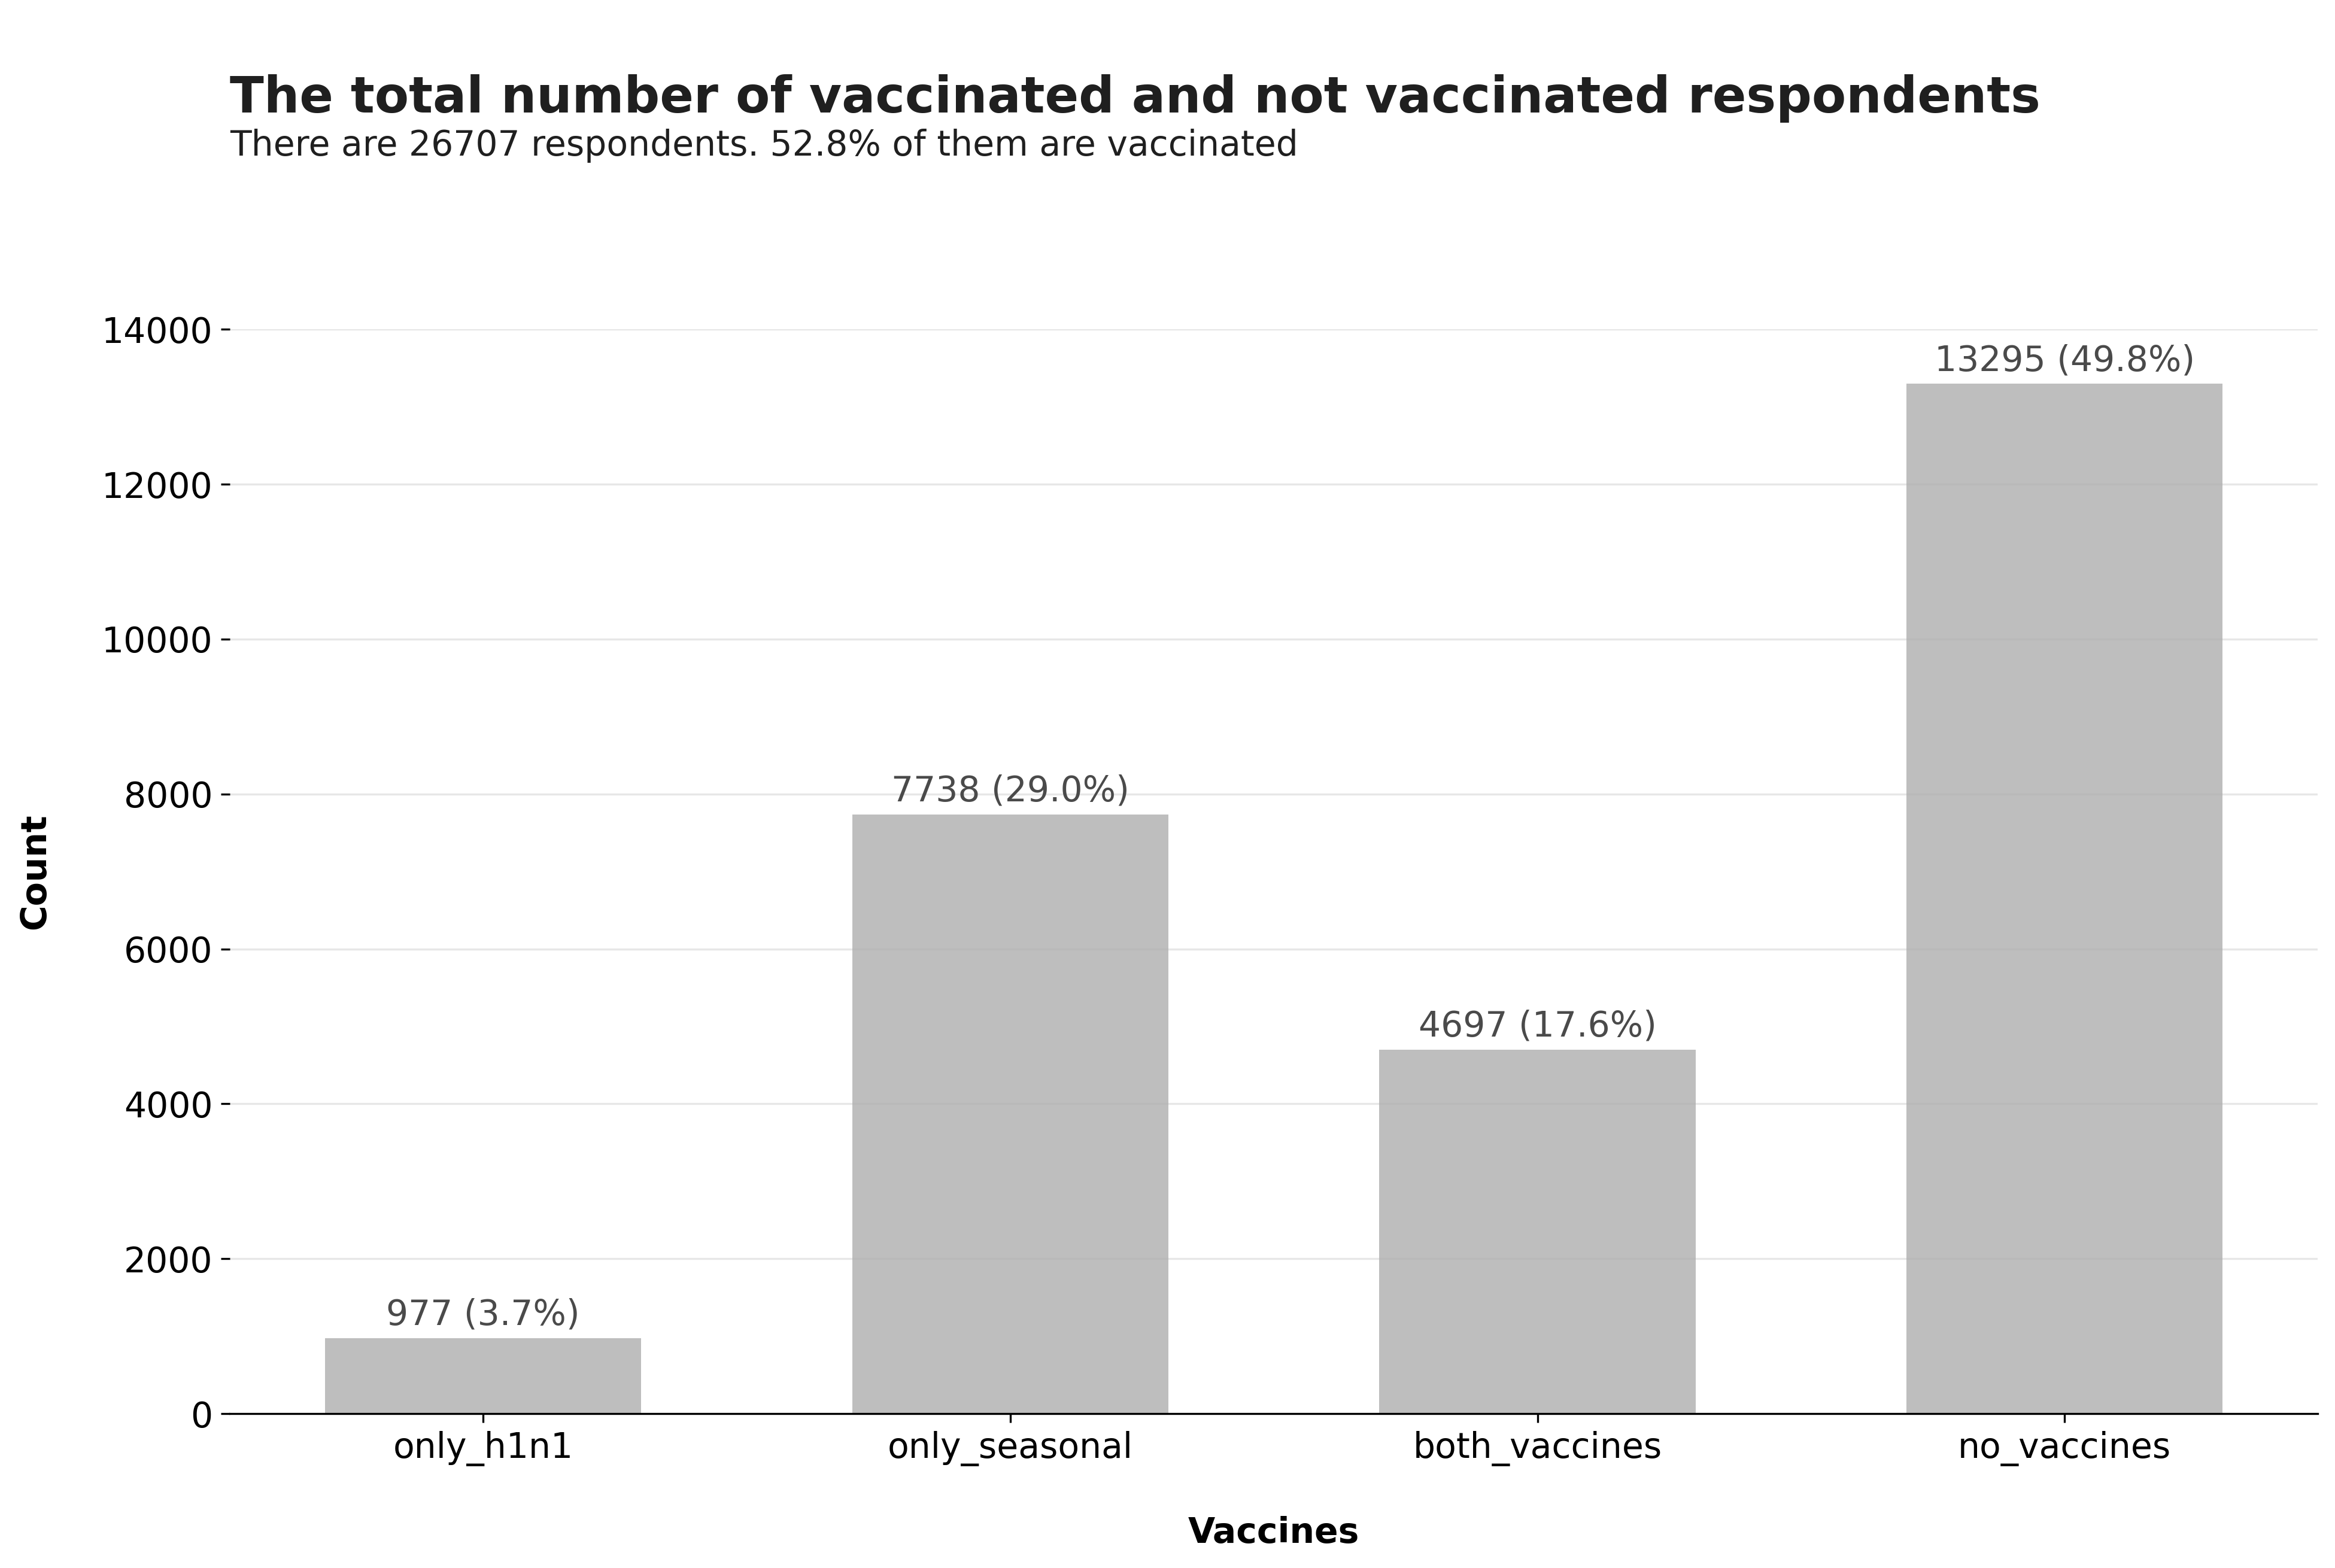

In [12]:
#@title barplot
# data for plotting
categories = targets_count['label'].values
category_count = targets_count['count'].values

# color palette
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']

# initialize the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(15, 8), dpi=300)

# bar
ax.bar(categories, category_count, color=colors_dark[3],
        width=0.6, linewidth=0.7,alpha=0.8)

# annotate
for i, count in enumerate(category_count):
    ax.annotate(
        f"{count} ({(100* count/np.sum(category_count)):.1f}%)", xy=(i, count + 300), 
        color='#4a4a4a', fontsize=14,
        va = 'center', ha='center', 
    )

# hide box line
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

# y limit
ax.set_ylim(0, 14000)

# grid
ax.grid(axis='y', alpha=0.3)

# ticks
ax.set_xticklabels(categories, fontsize=14)
ax.set_yticklabels(np.arange(0, 14001, 2000), fontsize=14)

# labels
ax.set_xlabel("\nVaccines", fontsize=14, fontweight='bold')
ax.set_ylabel("Count\n", fontsize=14, fontweight='bold')

# plot title
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# title
plt.text(s="\nThe total number of vaccinated and not vaccinated respondents", 
         ha='left', x=xmin, y=ymax*1.2, fontsize=20, fontweight='bold', color=colors_dark[0])
plt.text(s=f"There are {np.sum(category_count)} respondents. 52.8% of them are vaccinated", 
         ha='left', x=xmin, y=ymax*1.16, fontsize=14, color=colors_dark[0])
plt.show()

## 3. Data Preprocessing

### 3.1 Set up a validation framework

The train dataset were splitted into two sets, one for training set and the other is test set. The ratio of training and test set are 80:20.

In [13]:
X_train, X_val, y_train, y_val = train_test_split(
    train.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1),
    train[['h1n1_vaccine', 'seasonal_vaccine']],
    test_size=0.2,
    random_state=1,
    stratify=train[['h1n1_vaccine', 'seasonal_vaccine']]
)

In [14]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((21365, 35), (5342, 35), (21365, 2), (5342, 2))

### 3.2 Impute missing values and one-hot encode

For simplicity, the missing values will be imputed by each attribute mode.

In [15]:
def impute(X):
    X = X.copy()

    for col in list(X.columns):
        if X[col].isnull().sum() > 0:
           X[col] = X[col].fillna(X[col].mode()[0])
    
    return X

We applied a one-hot encode to remaining categorical variables that still in object dtype such as:

In [16]:
train.select_dtypes('O').columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

To easily encoded the remaining variables, DictVectorizer were used. Before using it, we need to transform our features matrix into dictionary. 

I built the pipeline for preprocessing that consists of: 
* An user-defined transformer to impute missing values and transform pd.DataFrame into dictionary.
* DictVectorizer to encode the categorical variables and smart enough to not encode the numerical variables.

In [17]:
def dict_input(X):
    return X.to_dict(orient='records')

def preprocess(X_train, X_val):
    # transform to dict then one-hot encode the categorical features
    pipeline = make_pipeline(
        FunctionTransformer(impute),
        FunctionTransformer(dict_input),
        DictVectorizer(sparse=False),
    )

    # fit and transform
    X_train = pipeline.fit_transform(X_train)
    X_val = pipeline.transform(X_val)

    # return dataframe
    feature_names = pipeline[-1].get_feature_names_out()
    X_train = pd.DataFrame(X_train, columns=feature_names)
    X_val = pd.DataFrame(X_val, columns=feature_names)

    return X_train, X_val, pipeline

In [18]:
X_train_processed, X_val_processed, preprocessor = preprocess(X_train, X_val)
X_train_processed.shape, X_val_processed.shape, y_train.shape, y_val.shape

((21365, 105), (5342, 105), (21365, 2), (5342, 2))

Now, the total number of features are 105 compared to original features, we got a 70 additional features. Let's verify if both features and labels matrix do not have a missing values anymore.

In [19]:
(X_train_processed.isnull().sum().sum(), 
 X_val_processed.isnull().sum().sum(),
 y_train.isnull().sum().sum(),
 y_val.isnull().sum().sum())

(0, 0, 0, 0)

## 4. Modelling

To build a model, I will use Multi Output Classifier and Classifier Chain from scikit-learn that are suitable for multilabel classification problem. The selected model are Decision Tree, Random Forest, Extra Trees, and XGB. I assumed the max_depth equals to 6 as initial guess. To evaluate the performance of both approach, Multi Output Classifier and Classfier Chain, I will do a repeated k-fold cross validation with 5 splits and 2 repeats.

In [20]:
clf_grid = [
        ("DecisionTreeClassifier", DecisionTreeClassifier(max_depth=6, random_state=1)), 
        ("ExtraTreesClassifier", ExtraTreesClassifier(max_depth=6, random_state=1)),
        ("RandomForestClassifier", RandomForestClassifier(max_depth=6, random_state=1)),
        ("XGBClassifier", XGBClassifier(max_depth=6, random_state=1)),
]

### 4.1 MultiOutputClassifier

In [21]:
def multi_output_clf(clf, X_train, X_test, y_train, y_test):
    # data preprocessing
    X_train, X_test, preprocessor = preprocess(X_train, X_test)
    
    # convert to np.array
    X_train, X_test = X_train.values, X_test.values
    y_train, y_test = y_train.values, y_test.values

    # fit the model
    model = MultiOutputClassifier(clf)
    model.fit(X_train, y_train)
        
    # predict the test set labels
    y_pred_train = model.predict_proba(X_train)
    y_pred_test = model.predict_proba(X_test)

    # roc auc score for training set
    auc_train_h1n1 = roc_auc_score(y_train[:, 0], y_pred_train[0][:, 1])
    auc_train_seasonal = roc_auc_score(y_train[:, 1], y_pred_train[1][:, 1])
    avg_auc_train = (auc_train_h1n1 + auc_train_seasonal) * 0.5

    # roc auc score for validation set
    if (y_test is not None):
      auc_test_h1n1 = roc_auc_score(y_test[:, 0], y_pred_test[0][:, 1])
      auc_test_seasonal = roc_auc_score(y_test[:, 1], y_pred_test[1][:, 1])
      avg_auc_test = (auc_test_h1n1 + auc_test_seasonal) * 0.5
      return model, preprocessor, avg_auc_train, avg_auc_test
    
    else:
      return model, preprocessor, y_pred_test[0][:, 1], y_pred_test[1][:, 1]


def cross_validation(X, y, clf_grid):
    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
    scores = []
    for name, clf in clf_grid:
        for train_idx, test_idx in tqdm(cv.split(X)):
            # split train and test set
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            model, preprocessor, auc_train, auc_test = multi_output_clf(
                clf, X_train, X_test, y_train, y_test
            )

            scores.append(
                (name, auc_train, auc_test, model, preprocessor)
            )
    return scores

def results(scores):
    result = pd.DataFrame(
        scores, columns=["name", "auc_train", "auc_val", "model", "preprocessor"]
    )
    return result.groupby('name').agg(func=['mean', 'std'])

if __name__ == "__main__":
    # split the dataset into features and labels
    X = train.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
    y = train[['h1n1_vaccine', 'seasonal_vaccine']]

    # cross validation
    scores = cross_validation(X, y, clf_grid)
    results_df = results(scores)
    display(results_df.round(4))

    # initialize an empty dictionary
    evaluation = {}
    evaluation['multi_output_clf'] = results_df

10it [00:57,  5.76s/it]
10it [02:59, 17.94s/it]
10it [02:22, 14.22s/it]
10it [06:54, 41.43s/it]


auc_train         auc_val        
                            mean     std    mean     std
name                                                    
DecisionTreeClassifier    0.8354  0.0012  0.8234  0.0039
ExtraTreesClassifier      0.8378  0.0017  0.8284  0.0041
RandomForestClassifier    0.8429  0.0011  0.8334  0.0042
XGBClassifier             0.9044  0.0012  0.8489  0.0045

### 4.2 ClassifierChain

In [22]:
def clf_chain(clf, X_train, X_test, y_train, y_test):
    # data preprocessing
    X_train, X_test, preprocessor = preprocess(X_train, X_test)
    
    # convert to np.array
    X_train, X_test = X_train.values, X_test.values
    y_train, y_test = y_train.values, y_test.values

    # fit the model
    model = ClassifierChain(clf)
    model.fit(X_train, y_train)
        
    # predict the test set labels
    y_pred_train = model.predict_proba(X_train)
    y_pred_test = model.predict_proba(X_test)

    # roc auc score for training set
    auc_train = roc_auc_score(y_train, y_pred_train)
    
    # roc auc score for validation set
    if (y_test is not None):
      auc_test = roc_auc_score(y_test, y_pred_test)
      return model, preprocessor, auc_train, auc_test
    
    else:
      return model, preprocessor, y_pred_test


def cross_validation(X, y, clf_grid):
    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
    scores = []
    for name, clf in clf_grid:
        for train_idx, test_idx in tqdm(cv.split(X)):
            # split train and test set
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            model, preprocessor, auc_train, auc_test = clf_chain(
                clf, X_train, X_test, y_train, y_test
            )

            scores.append(
                (name, auc_train, auc_test, model, preprocessor)
            )
    return scores

def results(scores):
    result = pd.DataFrame(
        scores, columns=["name", "auc_train", "auc_val", "model", "preprocessor"]
    )
    return result.groupby('name').agg(func=['mean', 'std'])

if __name__ == "__main__":
    # split the dataset into features and labels
    X = train.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
    y = train[['h1n1_vaccine', 'seasonal_vaccine']]

    # cross validation
    scores = cross_validation(X, y, clf_grid)
    results_df = results(scores)
    display(results_df.round(4))

    # save to dictionary
    evaluation['classifier_chain'] = results_df

10it [00:50,  5.04s/it]
10it [02:41, 16.16s/it]
10it [02:04, 12.48s/it]
10it [06:17, 37.73s/it]


auc_train         auc_val        
                            mean     std    mean     std
name                                                    
DecisionTreeClassifier    0.8286  0.0010  0.8182  0.0039
ExtraTreesClassifier      0.8363  0.0011  0.8276  0.0042
RandomForestClassifier    0.8419  0.0010  0.8330  0.0044
XGBClassifier             0.9012  0.0011  0.8473  0.0045

Multi Output Classifier has a ROC AUC score slightly better than Classifier Chain model. For final model, I will use Multi Output Classifier.

## Submission and final model

In this section, all train dataset are used to build a final model for deployment and prepare the submission file. I will not use preprocessor (sklearn pipeline) to transform the data in the production code, because I found this preprocessor did not work.

In [23]:
def final_model(n=4):
    # read the dataset
    PATH = "/mnt/c/Project/flu-shot-learning/"
    features = pd.read_csv(PATH + 'dataset/training_set_features.csv')
    targets = pd.read_csv(PATH + 'dataset/training_set_labels.csv')
    test = pd.read_csv(PATH + 'dataset/test_set_features.csv')
    submission = pd.read_csv(PATH + 'dataset/submission_format.csv')

    # concat the features and targets
    train = pd.concat(
        [features.drop('respondent_id', axis=1),
        targets.drop('respondent_id', axis=1)],
        axis=1
    )

    # split train dataset
    X_train = train.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
    y_train = train[['h1n1_vaccine', 'seasonal_vaccine']].values

    # test dataset
    X_test = test.drop('respondent_id', axis=1)

    # save features names
    feature_names = {}
    for feature in list(X_train.columns):
        feature_names[feature] = list(X_train[feature].unique())

    # impute missing values
    imputer = FunctionTransformer(impute)
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    # convert the features into a dictionary
    X_train = X_train.to_dict(orient='records')
    X_test = X_test.to_dict(orient='records')

    # one-hot encode with DictVectorizer
    preprocessor = DictVectorizer(sparse=False)
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)

    # classifier
    clf = XGBClassifier(max_depth=6, random_state=1)

    # fit the model
    model = MultiOutputClassifier(clf)
    model.fit(X_train, y_train)

    # predict the test set labels
    y_pred_test = model.predict_proba(X_test)

    # add predictions to submission file
    submission['h1n1_vaccine'] = y_pred_test[0][:, 1]
    submission['seasonal_vaccine'] = y_pred_test[1][:, 1]
    submission.to_csv(PATH + f"submission/submission_{n}.csv", index=False)
    print(f"submission_{n} has been saved")

    return imputer, preprocessor, model, feature_names

def save_pipeline(pipeline_dict):
    PATH = "/mnt/c/Project/flu-shot-learning/saved-pipeline/"
    with open(PATH + "saved_pipeline.bin", "wb") as file_in:
         pickle.dump(pipeline_dict, file_in)
    print("the pipeline has been saved")

def main():
    # final model
    imputer, preprocessor, model, feature_names = final_model(n=4)
    pipeline_dict = {
        "imputer": imputer,
        "preprocessor": preprocessor,
        "model": model,
        "features": feature_names
    }

    # saved the pipeline and model
    save_pipeline(pipeline_dict)

if __name__ == '__main__':
    main()

submission_4 has been saved
the pipeline has been saved


Check the saved_pipeline by reading it

In [24]:
def load_pipeline():
    PATH = "/mnt/c/Project/flu-shot-learning/saved-pipeline/"
    with open(PATH + "saved_pipeline.bin", "rb") as file_out:
         pipeline_dict = pickle.load(file_out)
    return pipeline_dict

load_pipeline().keys()

dict_keys(['imputer', 'preprocessor', 'model', 'features'])

The saved pipeline has successfully read. Now, I used a one observation from test dataset to test the model.

In [37]:
PATH = "/mnt/c/Project/flu-shot-learning/"
test = pd.read_csv(PATH + 'dataset/test_set_features.csv')
X_test = test.drop('respondent_id', axis=1)
display(X_test.iloc[3231:3232])

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
3231,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,mlyzmhmf,"MSA, Not Principle City",2.0,0.0,fcxhlnwr,haliazsg


In [39]:
def predict_probabilities(X: pd.DataFrame, pipeline):
    X = pipeline['imputer'].transform(X)
    X = X.to_dict(orient='records')
    X = pipeline['preprocessor'].transform(X)

    y_pred = pipeline['model'].predict_proba(X)
    y_pred_h1n1 = y_pred[0][:, 1][0]
    y_pred_seasonal = y_pred[1][:, 1][0]
    
    return y_pred_h1n1, y_pred_seasonal

if __name__ == '__main__':
    pipeline = load_pipeline()
    
    X = X_test.iloc[3231:3232]
    y_pred_h1n1, y_pred_seasonal = predict_probabilities(X, pipeline)
    
    display(f"The probability of getting the h1n1 vaccine: {y_pred_h1n1:.3f}")
    display(f"The probability of getting the seasonal vaccine: {y_pred_seasonal:.3f}")

'The probability of getting the h1n1 vaccine: 0.291'

'The probability of getting the seasonal vaccine: 0.074'